# Import required packages

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data-set(s)

In [59]:
train_data=pd.read_csv('../Salary_Train.csv')
train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [60]:
test_data=pd.read_csv('../Salary_Test.csv')
test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


# Understand the data

In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [62]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [63]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [64]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [65]:
train_data.duplicated().sum()

3258

## Data cleaning

In [66]:
# droping the duplicate values
train_data=train_data.drop_duplicates()

# EDA

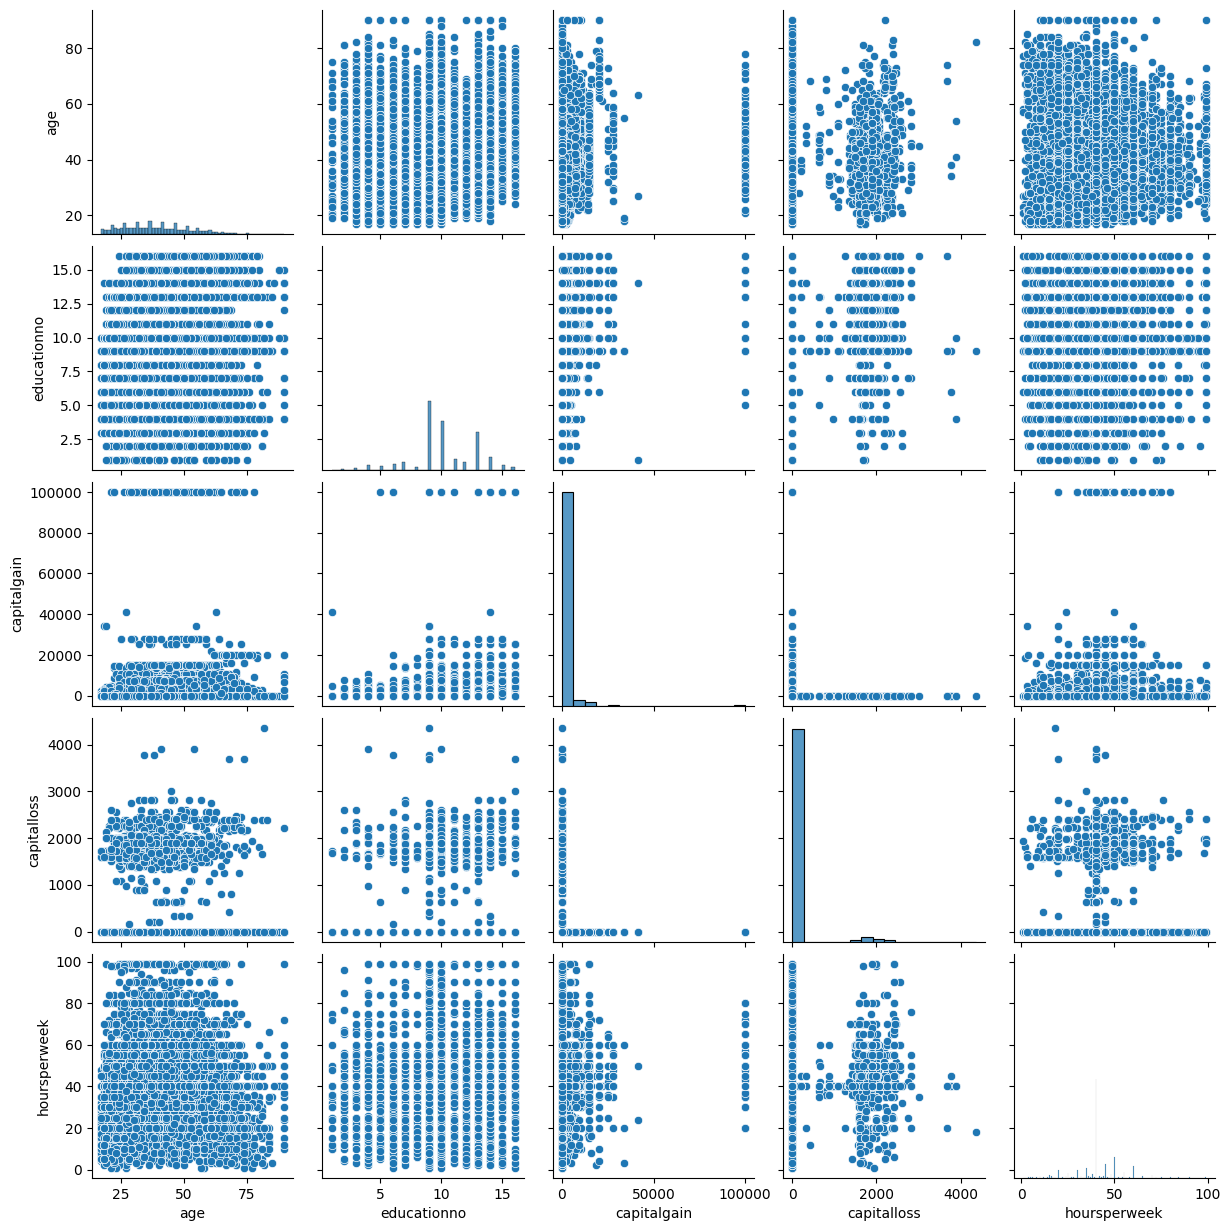

In [67]:
sns.pairplot(train_data)

In [68]:
categorical_cols = []
for col in train_data.columns:
    if train_data[col].dtype=='object':
        categorical_cols.append(col)

In [69]:
categorical_cols

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [70]:
for col in categorical_cols:
    print(col,train_data[col].nunique())

workclass 7
education 16
maritalstatus 7
occupation 14
relationship 6
race 5
sex 2
native 40
Salary 2


## One Hot Encoding (pd.get_dummies())

In [71]:
# train data
train_data = pd.get_dummies(train_data,columns=['workclass','maritalstatus','relationship','race','sex'],drop_first=True)


In [72]:
#test data
test_data = pd.get_dummies(test_data,columns=['workclass','maritalstatus','relationship','race','sex'],drop_first=True)

## Lable Encoding

In [73]:
#train data

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


train_data['education'] = encoder.fit_transform(train_data['education'])
train_data['occupation'] = encoder.fit_transform(train_data['occupation'])
train_data['native'] = encoder.fit_transform(train_data['native'])
train_data['Salary'] = encoder.fit_transform(train_data['Salary'])


In [75]:
# Test Data

test_data['education'] = encoder.fit_transform(test_data['education'])
test_data['occupation'] = encoder.fit_transform(test_data['occupation'])
test_data['native'] = encoder.fit_transform(test_data['native'])
test_data['Salary'] = encoder.fit_transform(test_data['Salary'])

In [76]:
train_data.describe()

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.254135,10.144296,6.053674,1215.443259,98.427499,41.164591,35.228711,0.255734
std,13.188825,3.864670,2.620154,4.026816,7805.366384,425.493211,12.347051,6.272069,0.436281
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,9.000000,9.000000,3.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,11.000000,10.000000,6.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,12.000000,13.000000,9.000000,0.000000,0.000000,45.000000,37.000000,1.000000
max,90.000000,15.000000,16.000000,13.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [50]:
train_data.corr()

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
age,1.000000,0.002717,0.038048,-0.004570,0.077235,0.052684,0.072529,0.010626,0.223502,0.060252,...,-0.022836,-0.079444,-0.391509,0.037777,0.016752,-0.016824,-0.025151,-0.038439,0.044387,0.070434
education,0.002717,1.000000,0.359940,-0.025890,0.034550,0.020469,0.058709,0.076605,0.090094,0.023799,...,0.021193,-0.037399,-0.021976,-0.005229,0.014276,0.012654,-0.012950,-0.027490,0.012479,-0.029841
educationno,0.038048,0.359940,1.000000,0.084300,0.126085,0.080025,0.145491,0.096279,0.332178,0.095491,...,0.050704,-0.096917,-0.090775,-0.062918,0.032949,0.062449,-0.077260,-0.051869,0.055766,0.010941
occupation,-0.004570,-0.025890,0.084300,1.000000,0.019724,0.010873,0.023073,0.003024,0.050711,0.046928,...,0.000484,-0.012917,-0.001891,-0.050508,-0.029909,-0.001081,-0.010288,0.004963,0.008425,0.066919
capitalgain,0.077235,0.034550,0.126085,0.019724,1.000000,-0.036023,0.079403,0.012902,0.228865,-0.013280,...,-0.030244,-0.022890,-0.051689,-0.033289,0.013219,0.002147,-0.025525,-0.001846,0.022864,0.053490
capitalloss,0.052684,0.020469,0.080025,0.010873,-0.036023,1.000000,0.049093,0.016784,0.153287,0.009894,...,-0.022830,-0.019434,-0.047231,-0.047655,0.011266,-0.002894,-0.031976,-0.010528,0.035129,0.053084
hoursperweek,0.072529,0.058709,0.145491,0.023073,0.079403,0.049093,1.000000,0.014100,0.225812,-0.004101,...,-0.000287,-0.056482,-0.236718,-0.051052,-0.067521,-0.009879,-0.067184,-0.007930,0.064921,0.228767
native,0.010626,0.076605,0.096279,0.003024,0.012902,0.016784,0.014100,1.000000,0.028547,0.033203,...,0.013904,-0.084481,0.028800,-0.006171,-0.007165,-0.217185,0.028258,-0.118244,0.109528,-0.004930
Salary,0.223502,0.090094,0.332178,0.050711,0.228865,0.153287,0.225812,0.028547,1.000000,0.025237,...,-0.194440,-0.090447,-0.216510,-0.154053,0.124060,0.009209,-0.094794,-0.035159,0.092988,0.217360
workclass_ Local-gov,0.060252,0.023799,0.095491,0.046928,-0.013280,0.009894,-0.004101,0.033203,0.025237,1.000000,...,-0.010132,-0.020162,-0.026225,0.027470,0.031357,-0.022006,0.035213,-0.017288,-0.019835,-0.040055


In [77]:
X_train = train_data.drop('Salary',axis=1)
Y_train = train_data['Salary']
x_test = test_data.drop('Salary',axis=1)
y_test = test_data['Salary']

In [45]:

# 1. Logistic Regression
# 2. Naive Bayes
# 3. KNN
# 4. SVM
# 5. Decision Tree
# 6. Random Forest
# 7. Adaboost


In [ ]:
# from sklearn.linear_model import LogisticRegression
# def Logistic_Regression():
#     LR = Logistic_Regression()

#     LR.fit(X_train,Y_train)

#     return LR

## Scaling 
- The values are different in range
- eg. 1-10,2000-10000
- Always scale before applying models like:
🔸 Logistic Regression
🔸 SVM
🔸 KNN
🔸 PCA
🔸 Gradient-based algorithms

- Don’t necessarily need scaling with:
 Tree-based models (Decision Trees, Random Forests, XGBoost)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test= scaler.fit_transform(x_test)

### Checking values count for Dependent Variable 

In [83]:
train_data['Salary'].value_counts()

Salary
0    20023
1     6880
Name: count, dtype: int64

## Sampling

In [79]:
# from imblearn.over_sampling import SMOTE

# X_train,Y_train = SMOTE().fit_resample(X_train,Y_train)

In [87]:
train_data['Salary'].value_counts()

Salary
0    20023
1     6880
Name: count, dtype: int64

In [84]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost": AdaBoostClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary')
    })


results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.712151   0.458064  0.937297  0.615385
1          Naive Bayes  0.759695   1.000000  0.021892  0.042846
2                  KNN  0.799270   0.574151  0.708378  0.634241
3                  SVM  0.777025   0.529101  0.840270  0.649332
4        Decision Tree  0.771182   0.528235  0.642162  0.579654
5        Random Forest  0.813479   0.603532  0.701892  0.649007
6             Adaboost  0.750000   0.495211  0.908378  0.640984
CPU times: user 43 s, sys: 1.74 s, total: 44.7 s
Wall time: 39.6 s
